In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def g_1(x, pi=0.7, alpha=-0.3):
    return x**3 + 3*x**2*(1-x)*(max(0,alpha)+pi*(1-abs(alpha))) + 3*x*(1-x)**2*(max(0,-alpha)+pi*(1-abs(alpha)))


Plot graph of g_1 function 

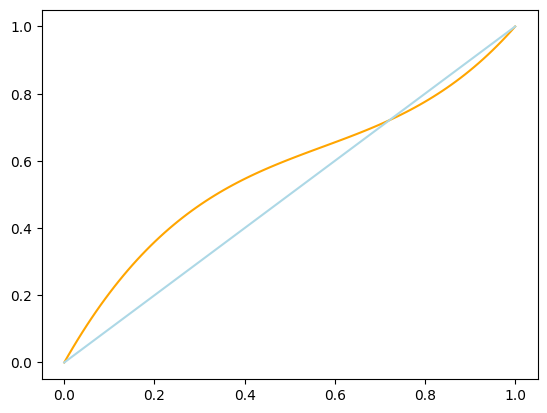

In [7]:
x = np.linspace(0, 1, 100)
y = g_1(x)
plt.plot(x, y, color='orange')
plt.plot(x, x, color = 'lightblue')

Compute distributions and beliefs

In [42]:
#produce distributions

def psi(x, k, n=3):
    return x**k*(1-x)**(n-k)

print(g_1(0.5))
epsilon = 1e-7
x0 = epsilon
x1 = g_1(x0)
print(epsilon, x1)
#xs = np.exp(np.linspace(np.log(x0), np.log(x1), 1001))
xs = np.linspace(x0, x1, 101)
all_xs = xs
k=0
while xs[-1] < 1 - epsilon:
    xs = g_1(xs)
    all_xs = np.concatenate((all_xs, xs))
    k += 1
distribution = all_xs
psi1 = np.sum(psi(distribution, 1))
psi2 = np.sum(psi(distribution, 2))
print(k, psi1, psi2)

0.52625
1e-07 1.1549999745000011e-07
384 439.0980242238719 598.9052001781205


Show distributions

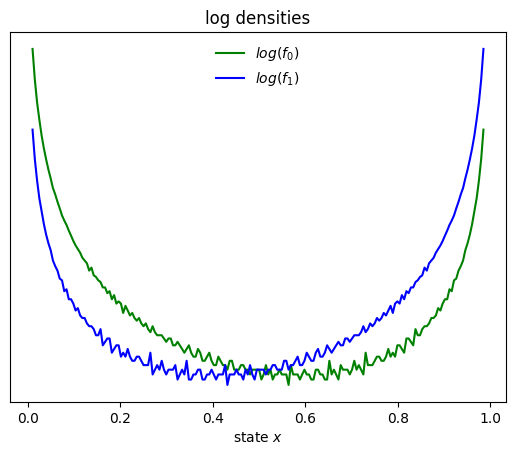

In [34]:
#show distributions
d1s = distribution
d0s = 1-distribution
bin_edges = np.linspace(0.01, 0.99, 201)
f0s, _ = np.histogram(d0s, bins=bin_edges)
f0s = f0s/np.max(f0s)
f1s, _ = np.histogram(d1s, bins=bin_edges)
f1s = f1s/np.max(f1s)
plt.plot(bin_edges[:-1], np.log(f0s), color='green', label='$log(f_0)$')
plt.plot(bin_edges[:-1], np.log(f1s), color='blue', label='$log(f_1)$')
plt.xlabel('state $x$')
plt.title(f'log densities')
plt.tick_params(left = False, right = False , labelleft = False)
plt.grid(False)
plt.legend(loc='best', frameon=False)


In [32]:
def psi(x, k, n=3):
    return x**k*(1-x)**(n-k)

psi1 = np.sum(psi(distribution, 1))
psi2 = np.sum(psi(distribution, 2))
print(psi1, psi2)

4351.852696726121 5935.68421053678


In [2]:
def alpha_range(pi):
    #g_0<1
    if pi <2/3:
        alpha_min = 1 - 1/(3*(1-pi))
    else: 
        alpha_min = 2/3/pi - 1
    alpha_max = 1 - 1/3/pi
    #g_1<1

    return alpha_min, alpha_max

print(alpha_range(0.9))

(-0.2592592592592593, 0.6296296296296297)


In [14]:
print(g_1(0.95, alpha = -0.2))

0.9613999999999999


In [4]:
x = np.linspace(0, 1, 100)
y = g_1(x, alpha = 0.3)-x
plt.plot(x, y)
plt.plot(x, x-x)

NameError: name 'np' is not defined

Draw dependence of beliefs p0 from pi 

C:\Users\mpesk\AppData\Local\Temp\ipykernel_1812\1456811944.py:2: RuntimeWarning: divide by zero encountered in log
  y = -np.log(3*(1-x))/(np.log(x/(1-x)))
C:\Users\mpesk\AppData\Local\Temp\ipykernel_1812\1456811944.py:2: RuntimeWarning: divide by zero encountered in divide
  y = -np.log(3*(1-x))/(np.log(x/(1-x)))
C:\Users\mpesk\AppData\Local\Temp\ipykernel_1812\1456811944.py:2: RuntimeWarning: invalid value encountered in divide
  y = -np.log(3*(1-x))/(np.log(x/(1-x)))


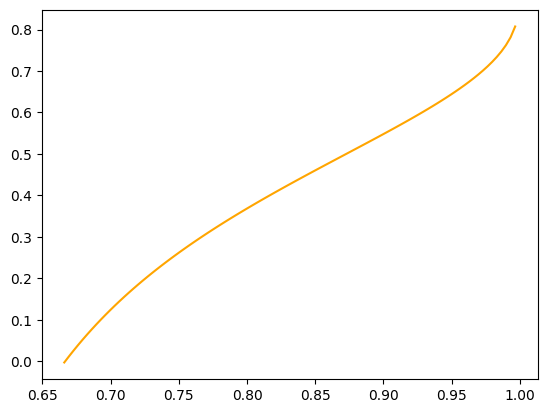

: 

In [5]:
x = np.linspace(0.666, 1, 100)
y = -np.log(3*(1-x))/(np.log(x/(1-x)))
plt.plot(x, y, color='orange')
